# Exploratory Data Analysis

In [19]:
from pathlib import Path
import pandas as pd

print('The data consists of both images and captions.')

path = Path('Flickr8k/Flicker8k_Dataset/')
n_images = sum(1 for x in path.glob('*.jpg') if x.is_file())
print(f'There are {n_images} images.')

df = pd.read_csv('Flickr8k/Flickr8k_text/Flickr8k.token.txt', delimiter='\t', header=None, names=['image', 'caption'])
print(f'There are {df.shape[0]} captions.')
print(f'The image file "2258277193_586949ec62.jpg" does not exist so there are only {df.shape[0] - 5} useable captions.')

The data consists of both images and captions.
There are 8091 images.
There are 40460 captions.
The image file "2258277193_586949ec62.jpg" does not exist so there are only 40455 useable captions.


In [2]:
display(df.head(10))
print(f'There are {df.shape[0] // n_images} captions for each image.')

,image,caption
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg#0,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg#1,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg#2,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg#3,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg#4,Two dogs on pavement moving toward each other .


There are 5 captions for each image.


## Frequency of words in the dataset

Stats and plots for the frequency of words in the dataset.

count     9630.000000
mean        49.502181
std        710.478526
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      40322.000000
dtype: float64


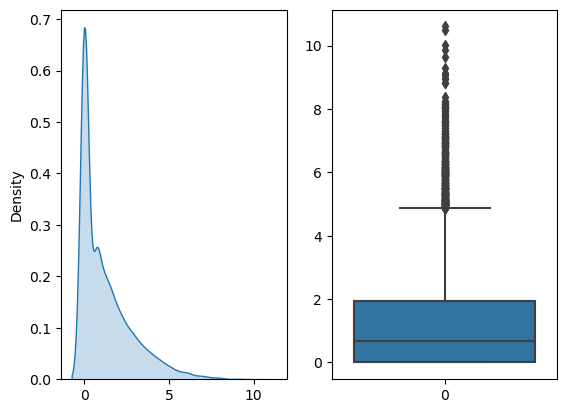

a       40322
.       36581
A       22667
in      18963
the     15329
on      10731
is       9345
and      8851
dog      7984
with     7760
dtype: int64


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_words = []
df['caption_length'] = df['caption'].apply(lambda x: n_words.extend(x.split()))
n_words = pd.Series(n_words).value_counts()
print('Stats and plots for the frequency of words in the dataset.\n')
print(n_words.describe())
plt.subplot(1,2,1)
sns.kdeplot(np.log(n_words), fill=True)
plt.subplot(1,2,2)
sns.boxplot(np.log(n_words))
plt.show()
print(n_words.head(10))

The word frequency in the dataset is right skewed.  
There are a few outliers with extreme values.  
Most of the words only occur one or two times.

## Frequency of words in each caption

Stats and plots for the frequency of words in each caption.

count    40460.000000
mean        11.782155
std          3.885175
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         38.000000
Name: caption_length, dtype: float64


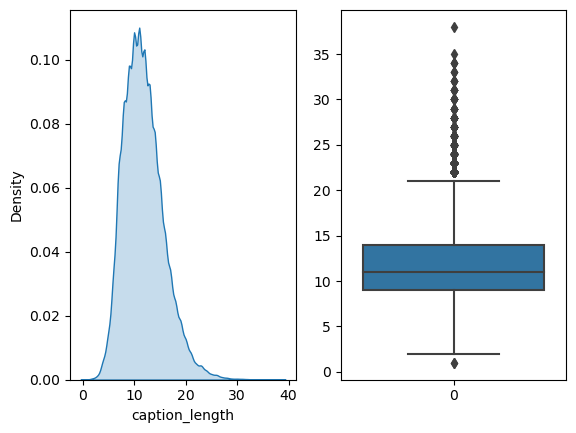

,image,caption,caption_length
5585,2165461920_1a4144eb2b.jpg#0,dogs racing,2
9310,2428275562_4bde2bc5ea.jpg#0,A,1
9598,244760301_5809214866.jpg#3,People walking,2
11368,256085101_2c2617c5d0.jpg#3,Dog yawns,2
13735,2714703706_d21c5cb8df.jpg#0,dogs playing,2
14303,2755314937_1e974bf2b5.jpg#3,broken image,2
15789,2862481071_86c65d46fa.jpg#4,Trucks racing,2
17109,2929669711_b2d5a640f0.jpg#4,man surfing,2
20327,3108732084_565b423162.jpg#2,a snowboarder,2
20677,3125309108_1011486589.jpg#2,rugby match,2


In [5]:
df['caption_length'] = df['caption'].apply(lambda x: len(x.split()))
print('Stats and plots for the frequency of words in each caption.\n')
print(df['caption_length'].describe())
plt.subplot(1,2,1)
sns.kdeplot(df['caption_length'], fill=True)
plt.subplot(1,2,2)
sns.boxplot(df['caption_length'])
plt.show()
display(df[df['caption_length'] < 3])

Each caption has about twelve words on average.  
The captions with only two words are brief but acceptable.  
However, there are two captions that have only the word "a".  These are errors and should be removed.
